# k-Nearest Neighbours (k-NN)
**If you have not yet read and done the exercises of chapters 4-6 https://course.elementsofai.com/, please do so now.**

Who is k-NN? Is it some underground band that is bringing a new sound with the banjo that lives next door? Steve Martin, watch out now. What is it? Does it make a pie better than [Patti LaBelle’s sweet potato pie](https://www.youtube.com/watch?v=eQRwFn7WPk8)? Well, no. 

Chapter 4.2 of https://course.elementsofai.com/ discussed the Nearest Neighbour (NN) classifier, wherein unclassified items are classified using the "nearest" known training-data-point's label. The k-NN classifier works very similarly; instead of using the single nearest known neighbour of an unknown datapoint, it uses the "k" nearest known neighbours and takes the most common class among those neighbours. Basically, with $k = 1$ k-NN would do the exact same as the NN classifier.

Consider the following example where the test sample (green dot) should be classified either to blue squares or to red triangles:

<img src="knn_classification.png" alt="k-NN" style="width: 400px;"/>


In the case of $k = 1$ k-NN would assign the test sample (green circle) to the class of red triangles, because the nearest other datapoint is a red triangle. If $k = 3$ (solid circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If $k = 5$ (dashed circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

Why or when would you use this? Well, there are times where data may be given that is anonymized and the goal is to attempt to classify it, without really knowing the context of the data. Think of grouping customer personalities to recommend specific products on websites like Amazon or AliExpress. 

This notebook will guide you through the process of classification using k-NN.

## Nearest Neighbour

First we will try to tackle the problem of finding the nearest neighbour. We will use the geometric distance (also known as straight-line distance, or Euclidean distance) to decide which is the nearest item. 

#### Euclidean Distance

The euclidean distance $d$ between point $p$ with coordinates $(p_x, p_y)$ and point $q$ with coordinates $(q_x, q_y)$ is defined as:

$$ d(p,q) = \sqrt{(p_x - q_x)^2 + (p_y - q_y)^2} $$

This can be read as; the straight-line distance between $p$ and $q$ is equal to the square root of the sum of squared differences in the $x$ and $y$ dimensions. (Which is still quite abstract).

To make this more clear, consider the following example:

![euclidean_distance.png](euclidean_distance.png)

The Euclidean distance between point $p$ and $q$ is depicted as the blue line ($C$). As you can see, we can use the Pythagorean Theorem ($A^2 + B^2 = C^2$) to calculate the length of $C$. To do this, we first need the length of $A$ and $B$. The length of $A$ is equal to $(q_x - p_x)$, while the length of $B$ is equal to $(q_y - p_y)$. Now, applying the Pythagorean Theorem we end up with:

$$ C^2 = A^2 + B^2 $$

$$ C = \sqrt{A^2 + B^2} = \sqrt{(p_x - q_x)^2 + (p_y - q_y)^2} = d(p,q)$$

If we now define the $x$ and $y$ dimensions to be $1$ and $2$, we can even rewrite our formula for the distance like this:

$$ d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2} $$ 

Which can be rewritten more formally:

$$ d(p,q) = \sqrt{\sum^2_{i=1}(p_i - q_i)^2} $$

__Write a piece of code that calculates the Euclidean distance between two sets of coordinates (`p` and `q`) and stores the solution in the variable `distance`.__ Write it such that it works for any `p` and `q`, as you will need this code later.

*Disclaimer; normally you would write functions to prevent duplicate code, but for this exercise "copy and pasting" code is okay. If, however, you would like to try to solve it using functions, you are free to do so.*

In [2]:
import math

p = (1, 2)
q = (3, 4)

### YOUR SOLUTION HERE
distance = 0

for p_i, q_i in zip(p, q):
    distance += (p_i - q_i) ** 2
    
distance = math.sqrt(distance)

In [3]:
# Testing cell
assert distance == math.sqrt(8), "Something is wrong in your calculation."

#### Finding the closest neighbour
Now that we can define the distance between two points, we can also find the closest neighbouring point of any given set of coordinates. This can be done by looping over every available point one by one, and saving both the distance and the point that is the closest every step.

We have provided you with a dictionary `points` that holds the values for the classes of our dataset. There are two possible class-values; $1$ and $-1$. For this exercise you do not need the values, but you can use the coordinates of the points. The plot below shows how the points are distributed. 

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt


points = {(20, 14): 1, (9, 23): -1, (2, 4): -1, (35, 20): 1, (39, 9): 1, (34, 5): 1, (18, 18): -1, (22, 4): 1, (3, 30):-1, (26, 35):1, (16, 38):-1}

def plot_points(points):
    # Loop over all points and assign red when the class is -1, green when 1
    for point, class_value in points.items():
        if class_value == -1:
            plt.scatter(*point, color="red")
        else:
            plt.scatter(*point, color="blue")

    plt.show()

__Write code that can find the closest point to point `p` from a dictionary of `points`, and save the result in `nearest_point` and the distance in `nearest_distance`.__ Copy the code from the last assignment and use it here to calculate the distances.

*Disclaimer; normally you would write functions to prevent duplicate code, but for this exercise "copy and pasting" code is okay. If, however, you would like to try to solve it using functions, you are free to do so.*

In [5]:
p = (23, 9)

# Set closest point to something very far away
nearest_point = None
nearest_distance = math.inf

# Loop over the coordinates in our `points` dictionary
for q in points:
    ### YOUR SOLUTION HERE
    distance = 0

    for p_i, q_i in zip(p, q):
        distance += (p_i - q_i) ** 2

    distance = math.sqrt(distance)
    
    if distance < nearest_distance:
        nearest_distance = distance
        nearest_point = q

In [6]:
# Testing cell
assert nearest_point == (22, 4), "This is not the closest point."
assert nearest_distance == math.sqrt(26), "This is not the correct distance."

#### Classifying
Finally, we need to classify our unknown point. We know what the nearest point is, so all we need to know now is what class it had. As we have discussed before, we have provided you with a dictionary that holds the values for the classes of the `points`. There are two possible class-values; $1$ and $-1$. Getting a value from the dictionary can be done as follows:

In [7]:
# Example using direct coordinates
print(f'The class-value for point {(9, 23)} is: {points[(9, 23)]}')

# Example using the nearest_point found in the last exercise
print(f'The class-value for point {nearest_point} is: {points[nearest_point]}')

The class-value for point (9, 23) is: -1
The class-value for point (22, 4) is: 1


__Write code that can find the class of point `p` and store the class-value in `p_class`.__ Copy the code from the last assignment and use it here to find the nearest neighbour.

*Disclaimer; normally you would write functions to prevent duplicate code, but for this exercise "copy and pasting" code is okay. If, however, you would like to try to solve it using functions, you are free to do so.*

In [31]:

def nn(p, points):
    p_class = 0

    # Set closest point to something very far away
    nearest_point = None
    nearest_distance = math.inf

    ### YOUR SOLUTION HERE
    for q in points:
        distance = 0

        for p_i, q_i in zip(p, q):
            distance += (p_i - q_i) ** 2

        distance = math.sqrt(distance)

        if distance < nearest_distance:
            nearest_distance = distance
            nearest_point = q
    ### END SOLUTION

    return points[nearest_point]

In [32]:
# Testing cell
p = (9, 12)

p_class = nn(p, points)

assert p_class == -1, "You have not found the correct class."

#### Visualising the result 

It is possible to visualise the correct classvalue of any given point given a dataset using something that is called a Voronoi diagram. A Voronoi diagram is a partition of a plane into regions determined by the datapoints. The idea is that each of the regions exists of an area that is closer to that region's datapoint than to any other datapoint. This means that we can simply use Nearest Neighbour to determine our regions. The Voronoi diagram that results from our datapoints is shown below:

![voronoi.png](voronoi.png)

In this image, the red areas are areas where the NN is one of the datapoints that belong to the negative class, and the blue areas are areas where the NN is one of the datapoints that belong to the positive class. The black line shows what we call the Decision Boundary; the region of a problem space in which the output label of our classifier is ambiguous. Any point that is exactly on top of this line can not be classified by our NN algorithm.

Building an exact Voronoi diagram can be quite complex, but we can also make an approximation by sampling the area of the whole plot. Below, we have provided you with the code to display how your NN algorithm classifies the points within the plot. __Call the function you made in the previous exercise, save the result in `p_class`, and see whether the result looks similar to the image above.__

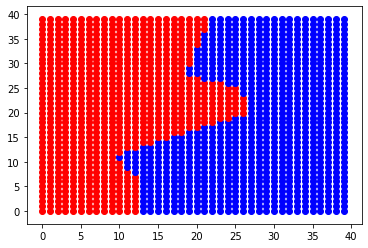

In [36]:
import numpy as np

N = 40

grid_points = {}

# Loop over a grid of points
for x in range(N):
    for y in range(N):
        p = (x, y)
        
        ### YOUR SOLUTION HERE
        p_class = nn(p, points)
        ### END SOLUTION

        # Add point with value to our new dictionary
        grid_points[p] = p_class

plot_points(grid_points)

## k-NN
Now that we have a method of finding the Nearest Neighbour, the step to finding $k$-Nearest Neighbours is fairly small. We can just repeat our previous method $k$ times while ignoring the points that we have already found.

There are several methods that you can use to ignore points that you have already determined were the closest. The simplest method, however, is using some python built-in tricks:

In [11]:
example_list = [(10, 12), (13, 4), (20, 5)]

if (20, 5) in example_list:
    print("The coordinate (20, 5) is in our list!")
else:
    print("The coordinate (20, 5) is not in our list...")
          
if (30, 3) not in example_list:
    print("The coordinate (30, 3) is not in our list...")

The coordinate (20, 5) is in our list!
The coordinate (30, 3) is not in our list...


As you can see, you can use the keyword `in` to see if a set of coordinates is in a `list`.

Below, we have provided you with a framework of code that saves which sets of coordinates were already found to be the closest. __Copy your code that finds the nearest neighbour. Then, add a piece of code that makes sure that `nearest_point` can not become a point that is already in `neighbours`.__

*Disclaimer; normally you would write functions to prevent duplicate code, but for this exercise "copy and pasting" code is okay. If, however, you would like to try to solve it using functions, you are free to do so.*

In [12]:
k = 3

p = (9, 12)
p_class = 0

neighbours = []

for i in range(k):
    # Set closest point to something very far away
    nearest_point = None
    nearest_distance = math.inf
    
    ### YOUR SOLUTION HERE
    for q in points:
        if q in neighbours:
            continue
            
        distance = 0

        for p_i, q_i in zip(p, q):
            distance += (p_i - q_i) ** 2

        distance = math.sqrt(distance)

        if distance < nearest_distance:
            nearest_distance = distance
            nearest_point = q
    ### END SOLUTION
    
    # Add the point to our list of neighbours
    neighbours.append(nearest_point)
    
print(neighbours)

[(2, 4), (18, 18), (9, 23)]


In [13]:
assert neighbours == [(2, 4), (18, 18), (9, 23)], "You have not found the correct neighbours."

Of course, this is not the most efficient method, as we have to re-calculate the distances every single time we try to find a new Nearest Neighbour. If you would like an added challenge, try to find a method that does not require you to re-calculate the distances. _(This is not a required exercise)_

### Determining the class-value

Now, we have to determine the class of our unknown datapoint. In k-NN this is done by taking the most common class among the Nearest Neighbours. Since we have defined our two possible class-values as $-1$ and $1$, this can easily be done by just taking the sum of the class labels of our `neighbours`, and seeing if this value is negative, positive, or zero. When the value of this sum is negative, there were more points with the class-value of $-1$ than there were points with the class-value of $1$. When the value of this sum is positive, the opposite is the case. When the value is zero, there were just as many points with a class-value of $-1$ as there were points with a class-value of $1$.

__Write code that can loop over the list `neighbours` and sums all class-values. Then, determine the resulting class value for our unknown datapoint and store the result in `class_outcome`.__

In [14]:
class_outcome = 0

### YOUR SOLUTION HERE
class_sum = 0

for neighbour in neighbours:
    class_sum += points[neighbour]
    
if class_sum < 0:
    class_outcome = -1
elif class_sum > 0:
    class_outcome = 1

In [15]:
assert class_outcome == -1, "The outcome is not correct."

### Combining everything
Finally, we get to combine everything into one! 

__Fill in the blanks in the cell below using your code from the exercises above.__

*Disclaimer; normally you would write functions to prevent duplicate code, but for this exercise "copy and pasting" code is okay. If, however, you would like to try to solve it using functions, you are free to do so.*

In [24]:

def knn(p, points, k):
    p_class = 0
    class_outcome = 0

    neighbours = []

    ### YOUR SOLUTION HERE
    for i in range(k):
        # Set closest point to something very far away
        nearest_point = None
        nearest_distance = math.inf

        for q in points:
            if q in neighbours:
                continue

            distance = 0

            for p_i, q_i in zip(p, q):
                distance += (p_i - q_i) ** 2

            distance = math.sqrt(distance)

            if distance < nearest_distance:
                nearest_distance = distance
                nearest_point = q

        # Add the point to our list of neighbours
        neighbours.append(nearest_point)

    class_sum = 0

    for neighbour in neighbours:
        class_sum += points[neighbour]

    if class_sum < 0:
        class_outcome = -1
    elif class_sum > 0:
        class_outcome = 1
    ### END SOLUTION    
        
    return class_outcome

In [25]:
k = 5
p = (20,17)

class_outcome = knn(p, points, k)

assert class_outcome == 1, "The point was classified incorrectly."

#### Visualising k-NN
Communicating your scientific results in an effective way is an important step in research. Often, when exploring a dataset or when you’re evaluating some statistical analysis, creating insightful visualizations of the data is an essential part of the process. Interactive data visualization allows a user to interact with the data in question. In some cases, this might lead to a greater understanding of the data compared to static visualizations.

Below, we have provided you with an interactive version of our earlier plot using `ipywidgets`. __Call the function you made in the previous exercise, save the result in `class_outcome`, and see whether the result looks like you expected.__

In [39]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

def plot_knn(k, points): 
    N = 40
    grid_points = {}

    # Loop over a grid of points
    for x in range(N):
        for y in range(N):
            p = (x, y)

            ### YOUR SOLUTION HERE
            class_outcome = knn(p, points, k)
            ### END SOLUTION

            # Assign the class to the point while adding it to our new dictionary
            grid_points[p] = class_outcome

    plot_points(grid_points)

interact(plot_knn, k=widgets.IntSlider(value=1, min=1, max=11, step=2, continuous_update=False), points=fixed(points));

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=11, min=1, step=2), Out…

## Questions
Answer the following questions about this notebook. Write your answers below each question in this cell.

__What happens if there is no clear winner in the majority voting? E.g. for $k=4$ there are 2 neighbours from class A and 2 neighbours from class B. Describe a solution to this problem, and argue why it would work.__

YOUR ANSWER HERE

__Does $k=1$ have high bias, or high variance? Explain.__

YOUR ANSWER HERE

__What is the tradeoff you are making when you are increasing the value of $k$? Relate your answer to the terms bias and variance.__

YOUR ANSWER HERE


